In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from datetime import datetime

In [6]:
# Load and preprocess data
df = pd.read_csv('3_benchmark_CN_CLI.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['DATE'] >= '1994-07-01']

# Select relevant columns and rename
plot_df = df[['DATE', 'CLI', 'MLP','log_CLI','log_MLP']].copy()


model_labels = {
    "log_CLI": "CLI",
    "log_MLP": "MLP"
}

# Melt the dataframe
melted_df = plot_df.melt(id_vars='DATE', var_name='Model', value_name='Value')

# Apply readable model labels AFTER melting
melted_df['Model'] = melted_df['Model'].map(model_labels)

# Define colors and line styles
model_colors = {
    "CLI": "#000000",     # black
    "MLP": "#999999",     # gray60
}

model_linetypes = {
    "CLI": "solid",
    "MLP": "dotted",
}

/var/folders/1b/b3lsjhy10fsd753tw_292d5w0000gn/T/ipykernel_10845/1888793106.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


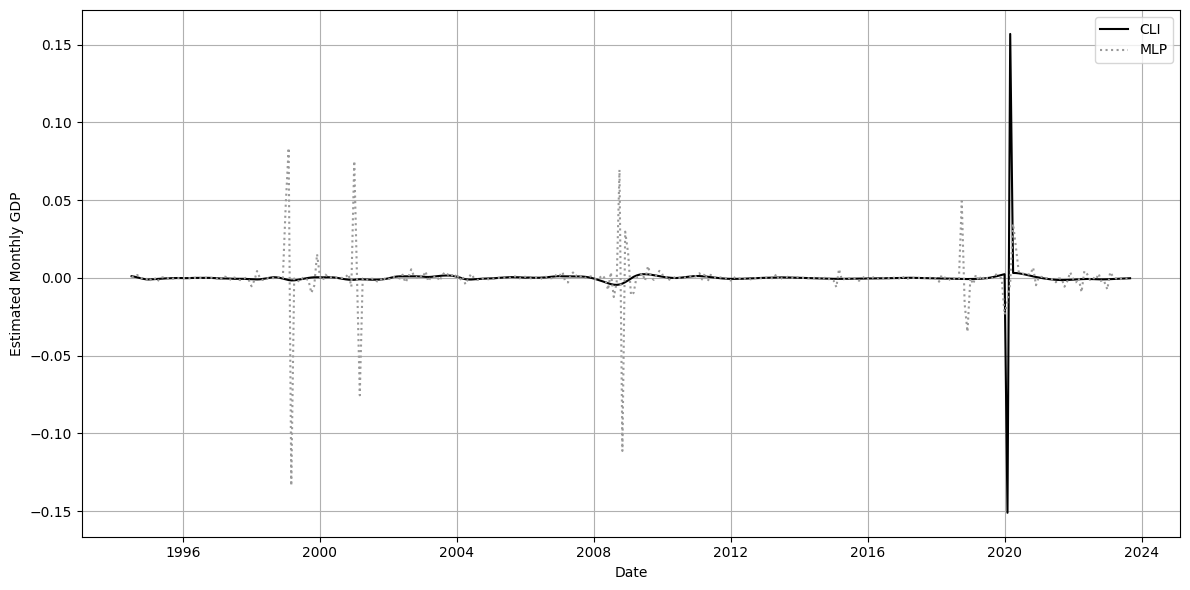

In [7]:
# Plot
plt.figure(figsize=(12, 6))

for model in ['CLI', 'MLP']:
    temp_df = melted_df[melted_df['Model'] == model]
    plt.plot(temp_df['DATE'], temp_df['Value'],
             label=model,
             color=model_colors.get(model, '#888888'),
             linestyle=model_linetypes.get(model, 'solid'))

plt.ylabel("Estimated Monthly GDP")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("CN_benchmark__CLI.pdf", bbox_inches='tight', dpi = 500)
plt.show()



In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

models = ['MLP']
results = []

for model in models:
    con_col = f'log_{model}'
    con_valid = df[['log_CLI', con_col]].dropna()
    y_true_con = con_valid['log_CLI']
    y_pred_con = con_valid[con_col]

    ann_col = f'ann_{model}'
    ann_valid = df[['ann_CLI', ann_col]].dropna()
    y_true_ann = ann_valid['ann_CLI']
    y_pred_ann = ann_valid[ann_col]

    mae = mean_absolute_error(y_true_con, y_pred_con)
    rmse = mean_squared_error(y_true_con, y_pred_con) ** 0.5
    corr = np.corrcoef(y_true_con, y_pred_con)[0, 1]
    sign_acc = (np.sign(y_true_ann) == np.sign(y_pred_ann)).mean()

    results.append({
        'Model': model,
        'MAE': mae,
        'RMSE': rmse,
        'Correlation': corr,
        'Sign Accuracy': sign_acc
    })

results_df = pd.DataFrame(results)
print(results_df)



  Model      MAE      RMSE  Correlation  Sign Accuracy
0   MLP  0.00429  0.017551     0.040175       0.817664
